# NETFLIX FILMU ANALIZE

# Projekto hipotezes:
- Ar Netflix platformoje yra daugiau Movies ar TV Shows? 
- Ar pandemijos metais (paskutiniai 2 metai) krito nauju Movies ir TV Shows kurimas ?
- Koks rating yra populiariausias? Ar medziaga tolygiai pritaikyta vaikams ir suaugusiems.
- Kurios salys kuria daugiausia Netflix turinio ?

 
Duomenys: https://www.kaggle.com/shivamb/netflix-shows

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import mysql.connector 
import json

In [2]:
with open("credentials.json", 'r') as fr:
    credentials = json.load(fr)

mydb = mysql.connector.connect(
    host="localhost", # IP address
    port="3306",
    user= credentials["user"],
    password= credentials["pass"],
)
cursor = mydb.cursor()
cursor.execute('USE Baigiamasis_darbas')
netflix = pd.read_sql('SELECT * FROM Netflix_titles', con=mydb)
netflix

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8783,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8784,s8804,TV Show,Zombie Dumb,,,,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8785,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8786,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Duomenu tikrinimas

In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8788 entries, 0 to 8787
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8788 non-null   object
 1   type          8788 non-null   object
 2   title         8788 non-null   object
 3   director      8788 non-null   object
 4   cast          8788 non-null   object
 5   country       8788 non-null   object
 6   date_added    8788 non-null   object
 7   release_year  8788 non-null   int64 
 8   rating        8788 non-null   object
 9   duration      8788 non-null   object
 10  listed_in     8788 non-null   object
 11  description   8788 non-null   object
dtypes: int64(1), object(11)
memory usage: 824.0+ KB


In [4]:
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])
netflix['cast'].replace(np.nan, 'No Data',inplace  = True)
netflix['director'].replace(np.nan, 'No Data',inplace  = True)

In [5]:
netflix.dropna(inplace=True)
netflix.drop_duplicates(inplace= True)

In [6]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8788 entries, 0 to 8787
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8788 non-null   object
 1   type          8788 non-null   object
 2   title         8788 non-null   object
 3   director      8788 non-null   object
 4   cast          8788 non-null   object
 5   country       8788 non-null   object
 6   date_added    8788 non-null   object
 7   release_year  8788 non-null   int64 
 8   rating        8788 non-null   object
 9   duration      8788 non-null   object
 10  listed_in     8788 non-null   object
 11  description   8788 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.5+ KB


In [43]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [44]:
netflix['target_ages'] = netflix['rating'].replace(ratings_ages)
netflix['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', '74 min', '84 min',
       '66 min', ''], dtype=object)

In [57]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,target_ages
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,Teens
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,Adults
3,s4,TV Show,Jailbirds New Orleans,,,,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,Adults
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8783,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,Adults
8784,s8804,TV Show,Zombie Dumb,,,,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,Older Kids
8785,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,Adults
8786,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,Older Kids


# Movies ir TV Shows duomenu lyginimas
Tikriname kokio tipo medziagos Netflix platformoje yra daugiau. 


Movies sudaro didesne dali. Palyginame ir procentaliai.

In [58]:
netflix['type'].value_counts()

Movie      6115
TV Show    2673
Name: type, dtype: int64

In [59]:
#Apskaiciuojame procentines vertes Tv Shows ir Movies 
netflix['type'].value_counts(normalize=True) * 100

Movie      69.583523
TV Show    30.416477
Name: type, dtype: float64

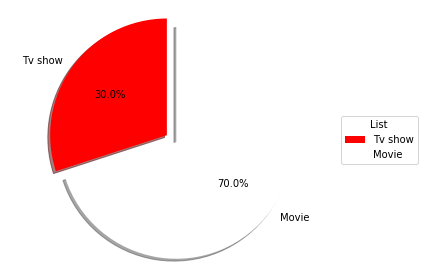

In [60]:
# Parodome procentines vertes diagramoje (gautas procentines reiksmes suapvalinau)
labels = 'Tv show', 'Movie'
sizes = [30, 70]
explode = (0, 0.1) 
colors = ( "red","white") 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors = colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

ax1.legend(
          title="List",
          loc="center left",
          bbox_to_anchor=(1, 0, 0, 1))
plt.tight_layout()
plt.show()

In [61]:
netflixmovie = netflix[netflix['type'] == 'Movie']
netflixmovie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,target_ages
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,Teens
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0,Older Kids
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,Adults
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0,Teens
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8782,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016.0,Adults
8783,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,Adults
8785,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,Adults
8786,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,Older Kids


In [62]:
netflixtvshow = netflix[netflix['type'] == 'TV Show']
netflixtvshow

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,target_ages
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,Adults
3,s4,TV Show,Jailbirds New Orleans,,,,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,Adults
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,Adults
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8776,s8796,TV Show,Yu-Gi-Oh! Arc-V,,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018.0,Older Kids
8777,s8797,TV Show,Yunus Emre,,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017.0,Older Kids
8778,s8798,TV Show,Zak Storm,,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0,Older Kids
8781,s8801,TV Show,Zindagi Gulzar Hai,,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016.0,Older Kids


# Realease year ir date added duomenu analize
Galime tvirtinti hipoteze, jog pastaraisiais (pandemijos) metais naujos medziagos kurimas ir kelimas i Netflix platforma yra zenkliai mazesnis. 

In [63]:
years = netflix['release_year'].value_counts()
years

2018    1145
2017    1030
2019    1026
2020     952
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [64]:
#Prisidedam dar du naujus stulpelius
netflix["date_added"] = pd.to_datetime(netflix['date_added'])
netflix['year_added'] = netflix['date_added'].dt.year
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,target_ages
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,Teens
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,Adults
3,s4,TV Show,Jailbirds New Orleans,,,,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,Adults
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8783,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,Adults
8784,s8804,TV Show,Zombie Dumb,,,,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,Older Kids
8785,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,Adults
8786,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,Older Kids


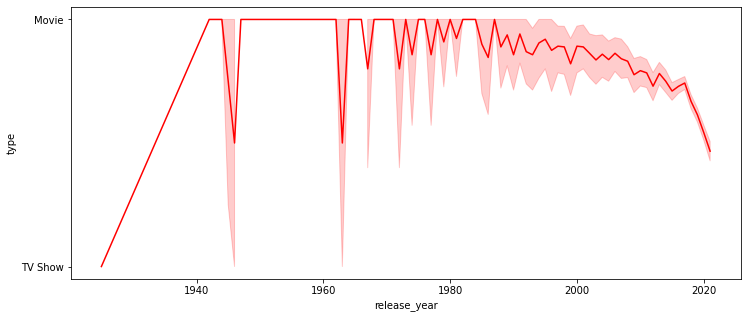

In [65]:
#yearspandemic = [2021, 20]
plt.figure(figsize=(12,5)) 
sns.lineplot(x='release_year',y='type',data=netflix,color="r")
plt.show()

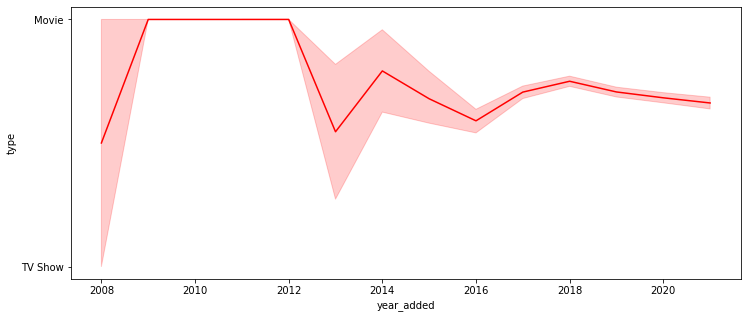

In [66]:
plt.figure(figsize=(12,5)) 
sns.lineplot(x='year_added',y='type',data=netflix,color="r")
plt.show()

In [67]:
from scipy.stats import norm

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='release_year'>

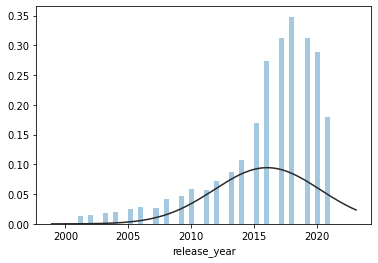

In [68]:
sns.distplot(netflix.loc[netflix['release_year'] > 2000, 'release_year'], fit=norm, kde=False)

# Ratings duomenu analize
Populiariausias rating yra TV-MA: TV Mature Audience Only This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17. Content Ratings Content Ratings are shown just below the program rating.

Medziaga yra labiausiai tinkama suaugusiems. 
Antroje vietoje yra paaugliai: 

TV-14:Programming rated TV-14 in the United States TV Parental Guidelines signifies content with parents strongly cautioned. It is equivalent to the MPAA film rating PG-13. Content may be unsuitable for minors younger than 14 years of age.

In [69]:
netflix['rating'].value_counts()

TV-MA       3195
TV-14       2158
TV-PG        863
R            796
PG-13        489
TV-Y7        334
TV-Y         307
PG           286
TV-G         220
NR            80
G             41
TV-Y7-FV       6
               4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

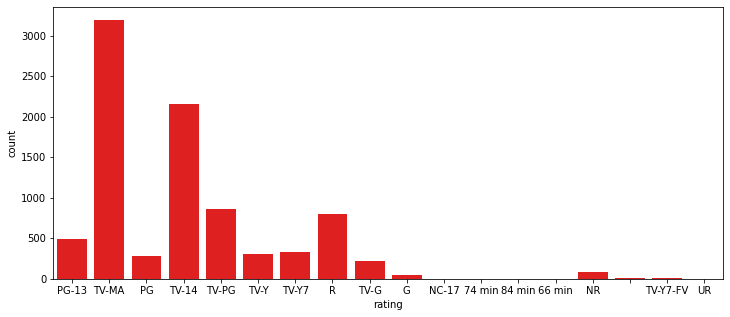

In [70]:
#populiariausias reitingas
plt.figure(figsize=(12,5)) 
sns.countplot(x='rating', data=netflix, color="r")

<AxesSubplot:xlabel='target_ages', ylabel='count'>

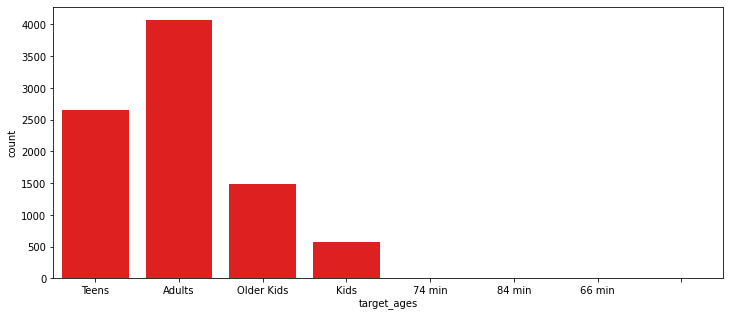

In [71]:
plt.figure(figsize=(12,5)) 
sns.countplot(x='target_ages', data=netflix, color="r")

# SENIAUSI IR NAUJAUSI NETFLIX FILMAI

In [72]:
#10 seniausiu filmu
oldm = netflix.sort_values("release_year", ascending = True)
oldm = oldm[oldm['duration'] != ""]
oldm[['title', "release_year"]][:10]

,title,release_year
4237,Pioneers: First Women Filmmakers*,1925
7771,Prelude to War,1942
8186,The Battle of Midway,1942
8744,WWII: Report from the Aleutians,1943
8720,Why We Fight: The Battle of Russia,1943
8641,Undercover: How to Operate Behind Enemy Lines,1943
8417,The Negro Soldier,1944
8400,The Memphis Belle: A Story of a\nFlying Fortress,1944
8621,Tunisian Victory,1944
7911,San Pietro,1945


In [73]:
# 10 naujausiu filmu
newm = netflix.sort_values("release_year", ascending = False)
newm = newm[newm['duration'] != ""]
newm[['title', "release_year"]][:10]

,title,release_year
690,Ali & Ratu Ratu Queens,2021
487,Elize Matsunaga: Once Upon a Crime,2021
1106,Madame Claude,2021
1105,Just Say Yes,2021
1104,Irul,2021
494,Cat People,2021
496,Dogs,2021
497,Major Grom: Plague Doctor,2021
1101,Concrete Cowboy,2021
500,The Mire,2021


# NETFLIX TURINIO ANALIZE VALSTYBIU ATZVILGIU

Is musu analizes matosi, jog daugiausiai turinio ateina is United States, antroje vietoje India.

In [74]:
netflix.groupby(['country']).country.value_counts().nlargest(10)


country         country       
United States   United States     2806
India           India              972
                                   830
United Kingdom  United Kingdom     419
Japan           Japan              245
South Korea     South Korea        199
Canada          Canada             181
Spain           Spain              145
France          France             123
Mexico          Mexico             110
Name: country, dtype: int64

In [75]:
netflixcountries = pd.DataFrame([["United States", 2806],["India", 972],["United Kingdom", 419],["Japan ", 245],["South Korea", 199],["Canada", 181],["Spain", 145],["France", 123],["Mexico", 110]], columns=['country2', 'value2'])
netflixcountries 
  

  

,country2,value2
0,United States,2806
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,123
8,Mexico,110


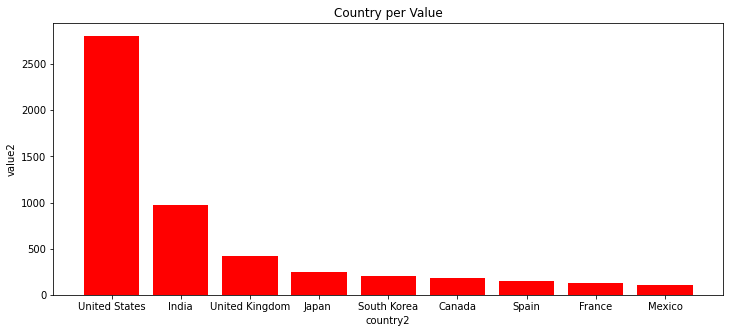

In [76]:
plt.figure(figsize=(12,5)) 
plt.bar(netflixcountries['country2'],netflixcountries['value2'],color="r")
plt.title('Country per Value')
plt.xlabel('country2')
plt.ylabel('value2')
plt.show()

# NETFLIX MOVIE IR TV SHOWS ZANRU ANALIZE

In [77]:
netflix['listed_in'].value_counts()

Dramas, International Movies                          361
Documentaries                                         358
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                273
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [78]:

netflixtypes = pd.DataFrame([["Dramas, International Movies", 361],["Documentaries", 358],["Stand-Up Comedy ", 334],["Comedies, Dramas, International Movies", 273],["Dramas, Independent Movies, International Movies", 252]], columns=['netflixtype', 'value3'])
netflixtypes

,netflixtype,value3
0,"Dramas, International Movies",361
1,Documentaries,358
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",273
4,"Dramas, Independent Movies, International Movies",252


In [79]:
netflixtypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   netflixtype  5 non-null      object
 1   value3       5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [92]:
from sklearn.preprocessing import MultiLabelBinarizer 

In [102]:
netflix['genre'] = netflix['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
netflix['genre'].head()

0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: genre, dtype: object

In [103]:
movie_netflix = netflix[netflix['type'] == 'Movie']
show_netflix = netflix[netflix['type'] == 'TV Show']

show_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,target_ages,genre
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,Adults,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,Adults,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,,,,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,Adults,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,Adults,"[International TV Shows, Romantic TV Shows, TV..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0,Adults,"[TV Dramas, TV Horror, TV Mysteries]"


In [130]:
pip install plotly


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [131]:
pip install nbformat

     |████████████████████████████████| 74 kB 1.4 MB/s 
     |████████████████████████████████| 72 kB 2.5 MB/s 
     |████████████████████████████████| 81 kB 5.2 MB/s 
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [132]:
import plotly.express as px
import plotly as plotly
import plotly.graph_objs as go

In [133]:
def calculate_mlb(series):
    mlb = MultiLabelBinarizer()
    mlb_netflix = pd.DataFrame(mlb.fit_transform(series), columns=mlb.classes_, index=series.index)
    return mlb_netflix

In [134]:
def top_genres(netflix, title='Top ones'):
    genres_netflix = calculate_mlb(netflix['genre'])
    tdata = genres_netflix.sum().sort_values(ascending=False)
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
    x=tdata.index,
    y=tdata.values,
    ))
    fig.update_xaxes(categoryorder='total descending')
    fig.update_layout(title=title)
    fig.show()

In [135]:
movie_netflix = netflix[netflix['type'] == 'Movie']


In [136]:

top_genres(movie_netflix, title='Top Movies Genres')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [127]:
top_movies_genres = [
    'International Movies',
    'Dramas',
    'Comedies',
    'Documentaries',
    'Action & Adventure',
]

In [128]:
top_genres(show_netflix, title='Top TV Shows Genres')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [27]:
netflix.to_csv(r'/Users/gertrudavarnaite/Desktop\Netflix-FINAL.csv', index = False)